In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

from multicamera_acquisition.interfaces.camera_basler import BaslerCamera, EmulatedBaslerCamera

## Refactored basler (emulated)

In [5]:
num_devices = 1
os.environ["PYLON_CAMEMU"] = f"{num_devices}"

# del os.environ['PYLON_CAMEMU']


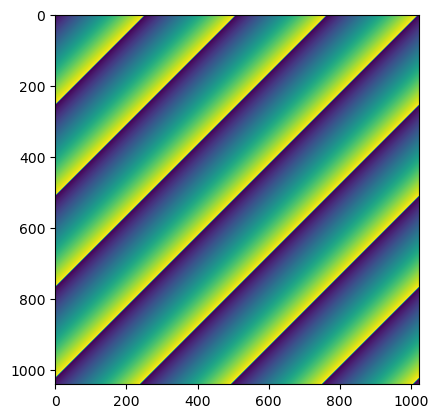

In [7]:
cam = EmulatedBaslerCamera(id=0)
cam.init()
cam.set_trigger_mode("continuous")  # allows cam to caquire without hardware triggers
cam.start()
img = cam.get_array(timeout=1000)
cam.stop()
plt.imshow(img)

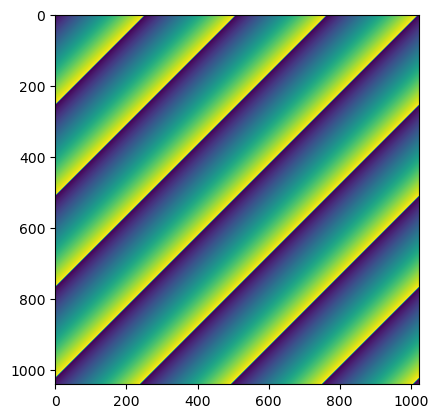

In [8]:
cam.start()
new_img = cam.get_array(timeout=1000)
cam.stop()
plt.imshow(new_img)

In [9]:
cam.close()

In [10]:
# cam.start()
# new_img = cam.get_array(timeout=1000)
# cam.stop()
# plt.imshow(new_img)

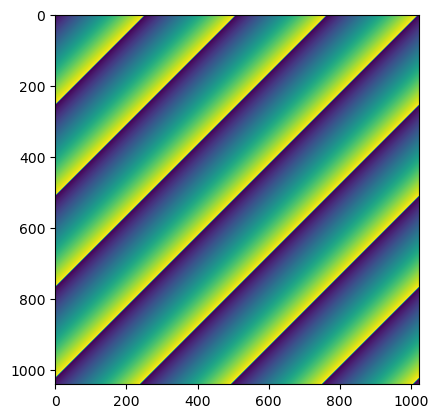

In [11]:
cam.init()
cam.set_trigger_mode("continuous")  # allows cam to caquire without hardware triggers
cam.start()
new_img = cam.get_array(timeout=1000)
cam.stop()
plt.imshow(new_img)

## Refactor config funcs

In [6]:
from multicamera_acquisition.interfaces.camera_basler import BaslerCamera
from multicamera_acquisition.acquisition import partial_config_from_camera_list, create_full_camera_default_config
from multicamera_acquisition.config.config import load_config

### Use case 1: user just loads a config file

In [7]:
config_filepath = "../multicamera_acquisition/scratch/test_recording/24-01-01-21-42-55-733138/recording_config.yaml"
# run_acquisition(config_filepath, ...)  # can just pass the path

# or if you want to inspect it
config = load_config(config_filepath)
config["cameras"]["bottom"]
# run_acquisition(config, ...)


{'brand': 'basler_emulated',
 'display': False,
 'exposure': 1000,
 'fps': 30,
 'gain': 6,
 'id': 1,
 'name': 'bottom',
 'roi': None,
 'trigger': {'acquisition_mode': 'Continuous',
  'short_name': 'arduino',
  'trigger_activation': 'RisingEdge',
  'trigger_selector': 'FrameStart',
  'trigger_source': 'Line2'},
 'writer': {'fps': 30, 'max_video_frames': 108000, 'pixel_format': 'gray8'}}

### Use case 2: user wants to specify values from a camera_list

In [8]:
quality = 15
exposure_time = 1000
fps = 120
camera_list = [
    {'name': 'top','id': "40338090", 'brand':'basler','gain': 30, 'gpu':0, "display":True, "trigger_line":"Line2", "quality": quality, "exposure_time":exposure_time},
    {'name': 'S1', 'id': "40338089", 'brand':'basler', 'gain': 30, 'gpu':1, "display":display, "trigger_line":"Line2", "quality": quality, "exposure_time":exposure_time},
    {'name': 'S2', 'id': "40338086", 'brand':'basler', 'gain': 30, 'gpu':0, "display":display, "trigger_line":"Line2", "quality": quality, "exposure_time":exposure_time},
    {'name': 'S3', 'id': "40338106", 'brand':'basler', 'gain': 30, 'gpu':1, "display":display, "trigger_line":"Line2", "quality": quality, "exposure_time":exposure_time},
    { 'name': 'S4', 'id': "40338091", 'brand':'basler', 'gain': 30, 'gpu':0, "display":display, "trigger_line":"Line2", "quality": quality, "exposure_time":exposure_time},
]

partial_new_config = partial_config_from_camera_list(camera_list, fps)
full_config = create_full_camera_default_config(partial_new_config)
full_config
# run_acquisition(full_config, ...)

{'cameras': {'top': {'name': 'top',
   'brand': 'basler',
   'id': '40338090',
   'writer': {'gpu': 0,
    'quality': 15,
    'fps': 120,
    'max_video_frames': 10368000,
    'pixel_format': 'gray8'},
   'display': True,
   'exposure_time': 1000,
   'fps': 120,
   'roi': None,
   'gain': 6,
   'exposure': 1000,
   'trigger': {'short_name': 'arduino',
    'acquisition_mode': 'Continuous',
    'trigger_source': 'Line2',
    'trigger_selector': 'FrameStart',
    'trigger_activation': 'RisingEdge'}},
  'S1': {'name': 'S1',
   'brand': 'basler',
   'id': '40338089',
   'writer': {'gpu': 1,
    'quality': 15,
    'fps': 120,
    'max_video_frames': 10368000,
    'pixel_format': 'gray8'},
   'display': <function IPython.core.display_functions.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, raw=False, clear=False, **kwargs)>,
   'exposure_time': 1000,
   'fps': 120,
   'roi': None,
   'gain': 6,
   'exposure': 1000,
   'trigger': {'short_name': 'ardu

### Use case 3: user changes stuff manually

In [9]:
old_config = load_config("../multicamera_acquisition/scratch/test_recording/24-01-01-21-42-55-733138/recording_config.yaml")
old_config["cameras"]["bottom"]["exposure_time"] = 1300
# run_acquisition(full_config, ...)

In [10]:
partial_new_config["cameras"]["top"]["brand"]

'basler'

In [12]:
camera_list = [
            {"name": "top", "brand": "basler", "id": 0},
            {"name": "bottom", "brand": "basler", "id": 1}
]
fps = 30
rt_display_params = None 

# set up the configs
partial_new_config = partial_config_from_camera_list(camera_list, fps)
partial_new_config

{'cameras': {'top': {'writer': {},
   'display': {},
   'name': 'top',
   'brand': 'basler',
   'id': 0,
   'fps': 30},
  'bottom': {'writer': {},
   'display': {},
   'name': 'bottom',
   'brand': 'basler',
   'id': 1,
   'fps': 30}}}